# Predict the closing stock price o a company using Long Short Term Memory (LSTM)

In [1]:
# Import Libraries
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# import stock quote
stock = 'AAPL'
df= yf.download(stock, '2014-01-01', '2022-08-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,19.791786,20.045713,19.785713,20.036428,17.693249,223084400
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.444420,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.061239,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.154274,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,17.031595,317209200
...,...,...,...,...,...,...
2022-07-25,154.009995,155.039993,152.279999,152.949997,152.737839,53623900
2022-07-26,152.259995,153.089996,150.800003,151.600006,151.389725,55138700
2022-07-27,152.580002,157.330002,152.160004,156.789993,156.572510,78620700


In [20]:
#Humber of cells
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

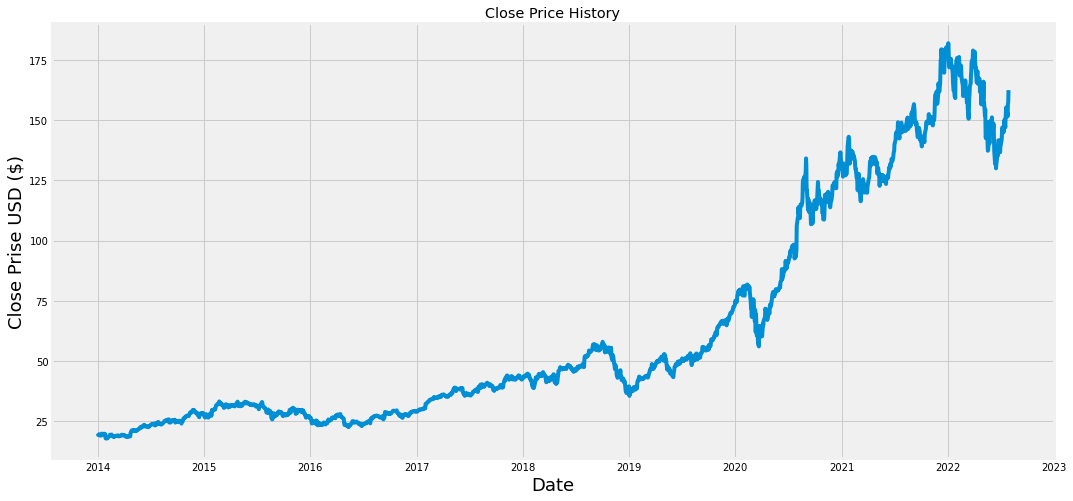

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Prise USD ($)', fontsize=18)
plt.show()

In [5]:
#Create new dataframe with onle Close Column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1728

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01332318],
       [0.01160666],
       [0.00896335],
       ...,
       [0.84637005],
       [0.84978142],
       [0.88121396]])

In [7]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01332318, 0.01160666, 0.00896335, 0.00960514, 0.00875885,
       0.00950289, 0.00799304, 0.00721419, 0.00782118, 0.01014033,
       0.01252693, 0.01185033, 0.0088959 , 0.01072339, 0.01125423,
       0.01227021, 0.01007071, 0.01103448, 0.00146199, 0.00021103,
       0.        , 0.00017839, 0.00038072, 0.00196018, 0.00278691,
       0.0027695 , 0.00432938, 0.00635484, 0.00787122, 0.0078625 ,
       0.00971392, 0.00961818, 0.01005331, 0.00817797, 0.00682476,
       0.00554117, 0.00604155, 0.00484717, 0.00382248, 0.00606767,
       0.00575656, 0.00608725, 0.00684434, 0.00708801, 0.00673774,
       0.0066703 , 0.00677473, 0.00789949, 0.00801262, 0.00671599,
       0.00541935, 0.00586534, 0.00687915, 0.0068487 , 0.00629175,
       0.00719896, 0.00857392, 0.00983575, 0.00870228, 0.00819754])]
[0.008067006485259418]

[array([0.01332318, 0.01160666, 0.00896335, 0.00960514, 0.00875885,
       0.00950289, 0.00799304, 0.00721419, 0.00782118, 0.01014033,
       0.01252693, 0.01185033, 0.0

In [8]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1668, 60, 1)

In [10]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1668/1668 [==============================] - 22s 12ms/step - loss: 6.3543e-04


In [13]:
#Create the testing data set
#Create a new array containing scaled values from index 1668 to 1728
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [15]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
# Get the models predicted price values
predictions1 = model.predict(x_test)
predictions = scaler.inverse_transform(predictions1)

14/14 [==============================] - 1s 9ms/step


In [17]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

9.868137447922319

C:\Users\damir\AppData\Local\Temp\ipykernel_18256\39546297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


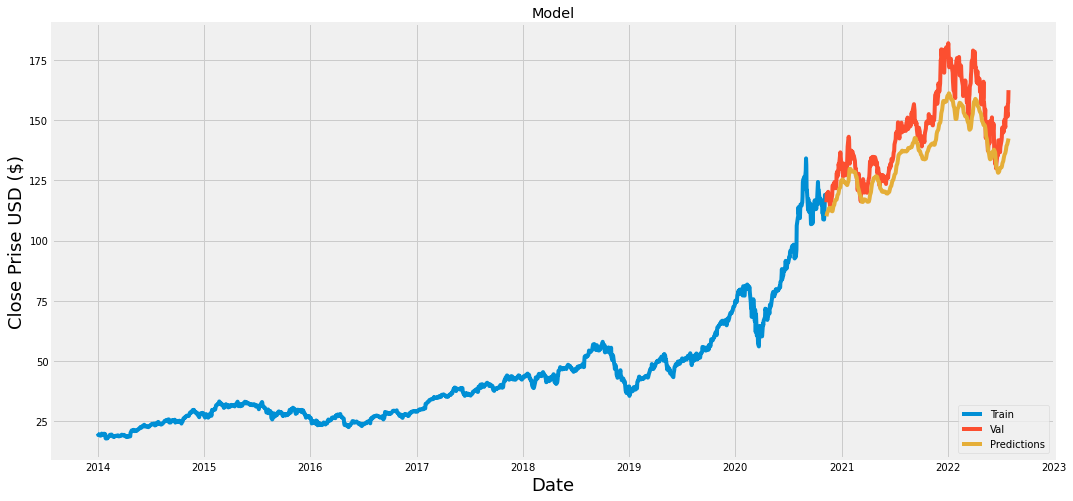

In [21]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Prise USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-11-10,115.970001,110.160187
2020-11-11,119.489998,110.561432
2020-11-12,119.209999,111.139244
2020-11-13,119.260002,111.728401
2020-11-16,120.300003,112.273735
...,...,...
2022-07-25,152.949997,140.152863
2022-07-26,151.600006,140.800232
2022-07-27,156.789993,141.170715


In [26]:
#Get the quote
stock_quote = yf.download(stock, '2014-01-01', '2022-08-23')
#Create a new dataframe
new_df = stock_quote.filter(['Close'])
#Get the last 60 day closing values and convert to array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 17ms/step
[[156.10658]]


In [27]:
stock_quote2 = yf.download(stock, '2022-08-22', '2022-08-23')
print(stock_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2022-08-22    167.570007
Name: Close, dtype: float64
